In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [2]:
pd.set_option('display.max_columns', None)

In [15]:
news_df = pd.read_csv('sentiment_score_news.csv')
prices_df = pd.read_csv('sentiment_score_prices.csv')

In [16]:
news_df

,Article_Date,Sentiment_Score_25%_negative,Sentiment_Score_25%_neutral,Sentiment_Score_25%_positive,Sentiment_Score_50%_negative,Sentiment_Score_50%_neutral,Sentiment_Score_50%_positive,Sentiment_Score_75%_negative,Sentiment_Score_75%_neutral,Sentiment_Score_75%_positive,Sentiment_Score_count_negative,Sentiment_Score_count_neutral,Sentiment_Score_count_positive,Sentiment_Score_max_negative,Sentiment_Score_max_neutral,Sentiment_Score_max_positive,Sentiment_Score_mean_negative,Sentiment_Score_mean_neutral,Sentiment_Score_mean_positive,Sentiment_Score_min_negative,Sentiment_Score_min_neutral,Sentiment_Score_min_positive,Sentiment_Score_std_negative,Sentiment_Score_std_neutral,Sentiment_Score_std_positive
0,2019-10-04,-0.22500,0.0,0.10100,-0.2250,0.0,0.134,-0.22500,0.0,0.16700,1.0,3.0,2.0,-0.225,0.0,0.200,-0.2250,0.0,0.134000,-0.225,0.0,0.068,NaN,0.0,0.093338
1,2019-10-05,-0.07125,0.0,0.14050,-0.0555,0.0,0.250,-0.03975,0.0,0.25000,2.0,2.0,3.0,-0.024,0.0,0.250,-0.0555,0.0,0.177000,-0.087,0.0,0.031,0.044548,0.0,0.126440
2,2019-10-06,-0.41450,0.0,0.25000,-0.3290,0.0,0.250,-0.24350,0.0,0.25000,2.0,3.0,1.0,-0.158,0.0,0.250,-0.3290,0.0,0.250000,-0.500,0.0,0.250,0.241831,0.0,NaN
3,2019-10-07,-0.20000,0.0,0.08100,-0.2000,0.0,0.104,-0.20000,0.0,0.25000,1.0,7.0,5.0,-0.200,0.0,0.250,-0.2000,0.0,0.149400,-0.200,0.0,0.062,NaN,0.0,0.093031
4,2019-10-08,NaN,0.0,0.14200,NaN,0.0,0.205,NaN,0.0,0.25000,NaN,3.0,6.0,NaN,0.0,0.300,NaN,0.0,0.190167,NaN,0.0,0.045,NaN,0.0,0.093958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2019-12-01,NaN,0.0,0.08800,NaN,0.0,0.088,NaN,0.0,0.08800,NaN,1.0,1.0,NaN,0.0,0.088,NaN,0.0,0.088000,NaN,0.0,0.088,NaN,NaN,NaN
58,2019-12-02,-0.07900,0.0,0.16700,-0.0580,0.0,0.225,-0.03700,0.0,0.43300,2.0,2.0,5.0,-0.016,0.0,0.443,-0.0580,0.0,0.262600,-0.100,0.0,0.045,0.059397,0.0,0.172832
59,2019-12-03,-0.22900,0.0,0.04525,-0.1580,0.0,0.062,-0.08700,0.0,0.07525,2.0,4.0,4.0,-0.016,0.0,0.079,-0.1580,0.0,0.058500,-0.300,0.0,0.031,0.200818,0.0,0.022279
60,2019-12-04,-0.29100,0.0,0.06500,-0.2900,0.0,0.093,-0.28900,0.0,0.14200,2.0,6.0,4.0,-0.288,0.0,0.214,-0.2900,0.0,0.114000,-0.292,0.0,0.056,0.002828,0.0,0.071870


In [5]:
prices_df

,CryptoCurrency Type,Trade Time(US Time),Daily High,Trade Date,Daily Low,Open,52-Week High,Prev.Close,52-Week Low,Market Cap,Volume,Circ.Supply,Max.Supply,Price Direction,Price Change(Open-Prev.Close),Price Change(Daily High-Daily Low)
0,BTC,06:13AM,8231.1500,6/10/2019,7931.3600,8168.9300,13829.0700,8168.2400,3178.3300,141.67 B,43.36 B,17.78 M,21.00 M,Up,0.69,299.79
1,ETH,06:13AM,177.6656,6/10/2019,172.4018,177.1539,362.8190,177.0681,82.4270,18.46 B,15.88 B,106.65 M,NaN,Up,0.09,5.26
2,XRP,06:13AM,0.2569,6/10/2019,0.2478,0.2543,0.5655,0.2543,0.2198,10.76 B,3.57 B,42.57 B,100.00 B,Down,0.00,0.01
3,BCC,06:13AM,226.3218,6/10/2019,218.3572,222.8465,642.8143,222.8102,74.7157,3.97 B,3.42 B,17.86 M,21.00 M,Up,0.04,7.96
4,LTC,06:13AM,57.3156,6/10/2019,55.4602,56.8784,145.8824,56.8571,22.6620,3.49 B,5.60 B,62.40 M,84.00 M,Up,0.02,1.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,ETC,04:43AM,3.8757,5/12/2019,3.7046,3.7466,9.8644,3.7459,3.2738,434.96 M,509.55 M,115.45 M,210.00 M,Up,0.00,0.17
896,NEO,04:43AM,9.1252,5/12/2019,8.4917,8.6575,20.9391,8.6573,5.4086,611.44 M,356.11 M,70.54 M,100.00 M,Up,0.00,0.63
897,LINK,04:42AM,2.0553,5/12/2019,1.9919,2.0447,3.1346,2.0434,0.2035,708.41 M,142.14 M,350.00 M,NaN,Up,0.00,0.06
898,XEM,04:42AM,0.0355,5/12/2019,0.0351,0.0352,0.0975,0.0353,0.0346,318.56 M,24.93 M,9.00 B,NaN,Down,0.00,0.00


In [17]:
#Fill any missing values
news_df = news_df.fillna(0)
# Drop columns with all zero values
news_df = news_df.loc[:, (news_df != 0).any(axis=0)]
news_df.head()

,Article_Date,Sentiment_Score_25%_negative,Sentiment_Score_25%_positive,Sentiment_Score_50%_negative,Sentiment_Score_50%_positive,Sentiment_Score_75%_negative,Sentiment_Score_75%_positive,Sentiment_Score_count_negative,Sentiment_Score_count_neutral,Sentiment_Score_count_positive,Sentiment_Score_max_negative,Sentiment_Score_max_positive,Sentiment_Score_mean_negative,Sentiment_Score_mean_positive,Sentiment_Score_min_negative,Sentiment_Score_min_positive,Sentiment_Score_std_negative,Sentiment_Score_std_positive
0,2019-10-04,-0.22500,0.1010,-0.2250,0.134,-0.22500,0.167,1.0,3.0,2.0,-0.225,0.20,-0.2250,0.134000,-0.225,0.068,0.000000,0.093338
1,2019-10-05,-0.07125,0.1405,-0.0555,0.250,-0.03975,0.250,2.0,2.0,3.0,-0.024,0.25,-0.0555,0.177000,-0.087,0.031,0.044548,0.126440
2,2019-10-06,-0.41450,0.2500,-0.3290,0.250,-0.24350,0.250,2.0,3.0,1.0,-0.158,0.25,-0.3290,0.250000,-0.500,0.250,0.241831,0.000000
3,2019-10-07,-0.20000,0.0810,-0.2000,0.104,-0.20000,0.250,1.0,7.0,5.0,-0.200,0.25,-0.2000,0.149400,-0.200,0.062,0.000000,0.093031
4,2019-10-08,0.00000,0.1420,0.0000,0.205,0.00000,0.250,0.0,3.0,6.0,0.000,0.30,0.0000,0.190167,0.000,0.045,0.000000,0.093958


In [18]:
#Merge datasets
merge_df = prices_df.merge(news_df,how='left',left_on=['Trade Date'],right_on=['Article_Date'])
merge_df 

,CryptoCurrency Type,Trade Time(US Time),Daily High,Trade Date,Daily Low,Open,52-Week High,Prev.Close,52-Week Low,Market Cap,Volume,Circ.Supply,Max.Supply,Price Direction,Price Change(Open-Prev.Close),Price Change(Daily High-Daily Low),Article_Date,Sentiment_Score_25%_negative,Sentiment_Score_25%_positive,Sentiment_Score_50%_negative,Sentiment_Score_50%_positive,Sentiment_Score_75%_negative,Sentiment_Score_75%_positive,Sentiment_Score_count_negative,Sentiment_Score_count_neutral,Sentiment_Score_count_positive,Sentiment_Score_max_negative,Sentiment_Score_max_positive,Sentiment_Score_mean_negative,Sentiment_Score_mean_positive,Sentiment_Score_min_negative,Sentiment_Score_min_positive,Sentiment_Score_std_negative,Sentiment_Score_std_positive
0,BTC,06:13AM,8231.1500,6/10/2019,7931.3600,8168.9300,13829.0700,8168.2400,3178.3300,141.67 B,43.36 B,17.78 M,21.00 M,Up,0.69,299.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ETH,06:13AM,177.6656,6/10/2019,172.4018,177.1539,362.8190,177.0681,82.4270,18.46 B,15.88 B,106.65 M,NaN,Up,0.09,5.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,XRP,06:13AM,0.2569,6/10/2019,0.2478,0.2543,0.5655,0.2543,0.2198,10.76 B,3.57 B,42.57 B,100.00 B,Down,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BCC,06:13AM,226.3218,6/10/2019,218.3572,222.8465,642.8143,222.8102,74.7157,3.97 B,3.42 B,17.86 M,21.00 M,Up,0.04,7.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LTC,06:13AM,57.3156,6/10/2019,55.4602,56.8784,145.8824,56.8571,22.6620,3.49 B,5.60 B,62.40 M,84.00 M,Up,0.02,1.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,ETC,04:43AM,3.8757,5/12/2019,3.7046,3.7466,9.8644,3.7459,3.2738,434.96 M,509.55 M,115.45 M,210.00 M,Up,0.00,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
896,NEO,04:43AM,9.1252,5/12/2019,8.4917,8.6575,20.9391,8.6573,5.4086,611.44 M,356.11 M,70.54 M,100.00 M,Up,0.00,0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
897,LINK,04:42AM,2.0553,5/12/2019,1.9919,2.0447,3.1346,2.0434,0.2035,708.41 M,142.14 M,350.00 M,NaN,Up,0.00,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
898,XEM,04:42AM,0.0355,5/12/2019,0.0351,0.0352,0.0975,0.0353,0.0346,318.56 M,24.93 M,9.00 B,NaN,Down,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#Fill any missing values after merging
merge_df = merge_df.fillna(0)
merge_df.isnull().any()

CryptoCurrency Type                   False
Trade Time(US Time)                   False
Daily High                            False
Trade Date                            False
Daily Low                             False
Open                                  False
52-Week High                          False
Prev.Close                            False
52-Week Low                           False
Market Cap                            False
Volume                                False
Circ.Supply                           False
Max.Supply                            False
Price Direction                       False
Price Change(Open-Prev.Close)         False
Price Change(Daily High-Daily Low)    False
Article_Date                          False
Sentiment_Score_25%_negative          False
Sentiment_Score_25%_positive          False
Sentiment_Score_50%_negative          False
Sentiment_Score_50%_positive          False
Sentiment_Score_75%_negative          False
Sentiment_Score_75%_positive    

## Feature Engineering

In [20]:
merge_df['Price Direction'] = np.where((merge_df['Price Direction'].isin(['Up'])),1,-1)
merge_df.head()

,CryptoCurrency Type,Trade Time(US Time),Daily High,Trade Date,Daily Low,Open,52-Week High,Prev.Close,52-Week Low,Market Cap,Volume,Circ.Supply,Max.Supply,Price Direction,Price Change(Open-Prev.Close),Price Change(Daily High-Daily Low),Article_Date,Sentiment_Score_25%_negative,Sentiment_Score_25%_positive,Sentiment_Score_50%_negative,Sentiment_Score_50%_positive,Sentiment_Score_75%_negative,Sentiment_Score_75%_positive,Sentiment_Score_count_negative,Sentiment_Score_count_neutral,Sentiment_Score_count_positive,Sentiment_Score_max_negative,Sentiment_Score_max_positive,Sentiment_Score_mean_negative,Sentiment_Score_mean_positive,Sentiment_Score_min_negative,Sentiment_Score_min_positive,Sentiment_Score_std_negative,Sentiment_Score_std_positive
0,BTC,06:13AM,8231.1500,6/10/2019,7931.3600,8168.9300,13829.0700,8168.2400,3178.3300,141.67 B,43.36 B,17.78 M,21.00 M,1,0.69,299.79,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ETH,06:13AM,177.6656,6/10/2019,172.4018,177.1539,362.8190,177.0681,82.4270,18.46 B,15.88 B,106.65 M,0,1,0.09,5.26,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,XRP,06:13AM,0.2569,6/10/2019,0.2478,0.2543,0.5655,0.2543,0.2198,10.76 B,3.57 B,42.57 B,100.00 B,-1,0.00,0.01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BCC,06:13AM,226.3218,6/10/2019,218.3572,222.8465,642.8143,222.8102,74.7157,3.97 B,3.42 B,17.86 M,21.00 M,1,0.04,7.96,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,LTC,06:13AM,57.3156,6/10/2019,55.4602,56.8784,145.8824,56.8571,22.6620,3.49 B,5.60 B,62.40 M,84.00 M,1,0.02,1.86,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
merge_df.columns

Index(['CryptoCurrency Type', 'Trade Time(US Time)', 'Daily High',
       'Trade Date', 'Daily Low', 'Open', '52-Week High', 'Prev.Close',
       '52-Week Low', 'Market Cap', 'Volume', 'Circ.Supply', 'Max.Supply',
       'Price Direction', 'Price Change(Open-Prev.Close)',
       'Price Change(Daily High-Daily Low)', 'Article_Date',
       'Sentiment_Score_25%_negative', 'Sentiment_Score_25%_positive',
       'Sentiment_Score_50%_negative', 'Sentiment_Score_50%_positive',
       'Sentiment_Score_75%_negative', 'Sentiment_Score_75%_positive',
       'Sentiment_Score_count_negative', 'Sentiment_Score_count_neutral',
       'Sentiment_Score_count_positive', 'Sentiment_Score_max_negative',
       'Sentiment_Score_max_positive', 'Sentiment_Score_mean_negative',
       'Sentiment_Score_mean_positive', 'Sentiment_Score_min_negative',
       'Sentiment_Score_min_positive', 'Sentiment_Score_std_negative',
       'Sentiment_Score_std_positive'],
      dtype='object')

# Original Dataset

In [11]:
#Create the Original Dataset
merge_df2 = merge_df.copy()
merge_df2 = merge_df2[['Daily High','Daily Low','52-Week High', 'Prev.Close',
       '52-Week Low', 'Price Change(Daily High-Daily Low)', 
       'Sentiment_Score_25%_negative', 'Sentiment_Score_25%_positive',
       'Sentiment_Score_50%_negative', 'Sentiment_Score_50%_positive',
       'Sentiment_Score_75%_negative', 'Sentiment_Score_75%_positive',
       'Sentiment_Score_count_negative', 'Sentiment_Score_count_neutral',
       'Sentiment_Score_count_positive', 'Sentiment_Score_max_negative',
       'Sentiment_Score_max_positive', 'Sentiment_Score_mean_negative',
       'Sentiment_Score_mean_positive', 'Sentiment_Score_min_negative',
       'Sentiment_Score_min_positive', 'Sentiment_Score_std_negative',
       'Sentiment_Score_std_positive','Price Direction']]
merge_df2.head()

,Daily High,Daily Low,52-Week High,Prev.Close,52-Week Low,Price Change(Daily High-Daily Low),Sentiment_Score_25%_negative,Sentiment_Score_25%_positive,Sentiment_Score_50%_negative,Sentiment_Score_50%_positive,Sentiment_Score_75%_negative,Sentiment_Score_75%_positive,Sentiment_Score_count_negative,Sentiment_Score_count_neutral,Sentiment_Score_count_positive,Sentiment_Score_max_negative,Sentiment_Score_max_positive,Sentiment_Score_mean_negative,Sentiment_Score_mean_positive,Sentiment_Score_min_negative,Sentiment_Score_min_positive,Sentiment_Score_std_negative,Sentiment_Score_std_positive,Price Direction
0,8231.1500,7931.3600,13829.0700,8168.2400,3178.3300,299.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,177.6656,172.4018,362.8190,177.0681,82.4270,5.26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.2569,0.2478,0.5655,0.2543,0.2198,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
3,226.3218,218.3572,642.8143,222.8102,74.7157,7.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,57.3156,55.4602,145.8824,56.8571,22.6620,1.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [12]:
merge_df2.shape

(900, 24)

# Standard Scaled Dataset

In [13]:
#Create the Standard Scaled Dataset
#Perform scaling on dataset
scaler = StandardScaler()
merge_df_scaled = scaler.fit_transform(merge_df2)
merge_df_scaled = pd.DataFrame(merge_df_scaled.reshape(900,24), columns = list(merge_df2.columns))

merge_df_scaled['Price Direction'] = merge_df2['Price Direction']
merge_df_scaled.head()

,Daily High,Daily Low,52-Week High,Prev.Close,52-Week Low,Price Change(Daily High-Daily Low),Sentiment_Score_25%_negative,Sentiment_Score_25%_positive,Sentiment_Score_50%_negative,Sentiment_Score_50%_positive,Sentiment_Score_75%_negative,Sentiment_Score_75%_positive,Sentiment_Score_count_negative,Sentiment_Score_count_neutral,Sentiment_Score_count_positive,Sentiment_Score_max_negative,Sentiment_Score_max_positive,Sentiment_Score_mean_negative,Sentiment_Score_mean_positive,Sentiment_Score_min_negative,Sentiment_Score_min_positive,Sentiment_Score_std_negative,Sentiment_Score_std_positive,Price Direction
0,4.193910,4.241201,4.353429,4.271505,4.355725,2.858229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,-0.155316,-0.153241,-0.140833,-0.153115,-0.138064,-0.175465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,-0.251124,-0.250744,-0.261732,-0.251015,-0.257390,-0.229540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
3,-0.129039,-0.127213,-0.047386,-0.127789,-0.149257,-0.147654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,-0.220310,-0.219473,-0.213234,-0.219675,-0.224815,-0.210485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# Feature Selected Dataset

In [16]:
#PCA fit to dataset
merge_df_pca = PCA().fit(merge_df2)

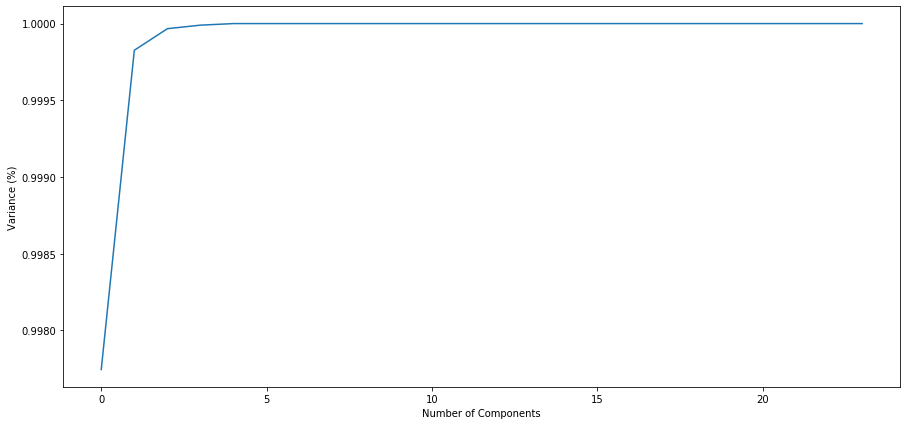

In [17]:
#Plot PCA Plot
%matplotlib inline
plt.figure(figsize=(15, 7))
plt.plot(np.cumsum(merge_df_pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.show()

In [136]:
#Create the Feature Selected Dataset
#Feature Selection with SelectKBest
array = merge_df2.values
X = array[:,0:23]
Y = array[:,23]
fvalue_selector = SelectKBest(f_classif, k=5)
X_kbest = fvalue_selector.fit_transform(X, Y)

C:\Users\Tess-leslie\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22] are constant.
  UserWarning)
C:\Users\Tess-leslie\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [137]:
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 23
Reduced number of features: 5


In [138]:
merge_df_fselect = pd.DataFrame(X_kbest.reshape(900,5))
merge_df_fselect.head()

,0,1,2,3,4
0,8231.1500,7931.3600,13829.0700,8168.2400,3178.3300
1,177.6656,172.4018,362.8190,177.0681,82.4270
2,0.2569,0.2478,0.5655,0.2543,0.2198
3,226.3218,218.3572,642.8143,222.8102,74.7157
4,57.3156,55.4602,145.8824,56.8571,22.6620


In [139]:
#Merging the feature selected dataset with target labels 'Price Direction'
merge_df_fselect.columns = ['Daily High','Daily Low','52-Week High','Prev.Close','52-Week Low']
merge_df_fselect['Price Direction'] = merge_df2[['Price Direction']] 

In [140]:
merge_df_fselect.head()

,Daily High,Daily Low,52-Week High,Prev.Close,52-Week Low,Price Direction
0,8231.1500,7931.3600,13829.0700,8168.2400,3178.3300,1
1,177.6656,172.4018,362.8190,177.0681,82.4270,1
2,0.2569,0.2478,0.5655,0.2543,0.2198,-1
3,226.3218,218.3572,642.8143,222.8102,74.7157,1
4,57.3156,55.4602,145.8824,56.8571,22.6620,1


## Modelling with KNN Classifier ( Predicting Price Direction as Target Variable)

# KNN Classifier Original Dataset

In [106]:
#Split train and test set 80% and 20% respectively
train = merge_df2[:int(0.8*len(merge_df2))]
test = merge_df2[:int(0.2*len(merge_df2))]

x_train = train.copy()
x_train = train.drop(['Price Direction'],axis=1)
#Prepare train set with target labels
y_train = train[['Price Direction']].copy()

x_test = test.copy()
x_test = test.drop(['Price Direction'],axis=1)
#Prepare test set with target labels
y_test = test[['Price Direction']].copy()

In [113]:
K = 3
model = KNeighborsClassifier(n_neighbors = K)
#Fit model to train set
model.fit(x_train, np.ravel(y_train))
#Fit model to test set
preds = model.predict(x_test)

In [114]:
#Convert y_test label and predicted labels from dataframe to list
y_test = y_test.values
y_test = np.array(y_test).flatten()
preds = np.array(preds).flatten()
y_test = y_test.tolist()
preds = preds.tolist()

In [115]:
#Create the confusion matrix
y_test = pd.Series(y_test, name='Actual')
y_pred = pd.Series(preds, name='Predicted')
df_confusion = pd.crosstab(y_test, y_pred,rownames=['True'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,-1,1,All
True,,,
-1,89,14,103
1,34,43,77
All,123,57,180


# KNN Classifier Scaled Dataset

In [116]:
#Split train and test set 80% and 20% respectively
train = merge_df_scaled[:int(0.8*len(merge_df_scaled))]
test = merge_df_scaled[:int(0.2*len(merge_df_scaled))]

In [117]:
x_train = train.copy()
x_train = train.drop(['Price Direction'],axis=1)
#Prepare train set target label
y_train = train[['Price Direction']].copy()

x_test = test.copy()
#Drop target label from test set
x_test = test.drop(['Price Direction'],axis=1)
#Prepare test set target label
y_test = test[['Price Direction']].copy()

In [118]:
K = 3
model = KNeighborsClassifier(n_neighbors = K)
#Fit model to train set
model.fit(x_train, np.ravel(y_train))
#Fit model to test set
preds = model.predict(x_test)

In [119]:
#Convert y_test label and predicted labels from dataframe to list
y_test = y_test.values
y_test = np.array(y_test).flatten()
preds = np.array(preds).flatten()
y_test = y_test.tolist()
preds = preds.tolist()

In [120]:
#Bulit confusion matrix
y_test = pd.Series(y_test, name='Actual')
y_pred = pd.Series(preds, name='Predicted')
df_confusion = pd.crosstab(y_test, y_pred,rownames=['True'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,-1,1,All
True,,,
-1,84,19,103
1,28,49,77
All,112,68,180


# KNN Classifier Feature Selected Dataset

In [121]:
#Split train and test set 80% and 20% respectively
train = merge_df_fselect[:int(0.8*len(merge_df_fselect))]
test = merge_df_fselect[:int(0.2*len(merge_df_fselect))]

x_train = train.copy()
x_train = train.drop(['Price Direction'],axis=1)
#Prepare train set target label
y_train = train[['Price Direction']].copy()

x_test = test.copy()
x_test = test.drop(['Price Direction'],axis=1)
#Prepare test set target label
y_test = test[['Price Direction']].copy()

In [128]:
K = 3
model = KNeighborsClassifier(n_neighbors = K)
#Fit model to training set
model.fit(x_train, np.ravel(y_train))
#Fit model to test set
preds = model.predict(x_test)

In [129]:
#Convert y_test label and predicted labels from dataframe to list
y_test = y_test.values
y_test = np.array(y_test).flatten()
preds = np.array(preds).flatten()
y_test = y_test.tolist()
preds = preds.tolist()

In [130]:
# Built the confusion matrix
y_test = pd.Series(y_test, name='Actual')
y_pred = pd.Series(preds, name='Predicted')
df_confusion = pd.crosstab(y_test, y_pred,rownames=['True'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,-1,1,All
True,,,
-1,88,15,103
1,36,41,77
All,124,56,180


## Modelling with KNN Regression ( Predicting Open as Target Variable)

# KNN Regression Original Dataset

In [86]:
#Prepare Original Dataset with Open price as Target
merge_df3 = merge_df.copy()
merge_df3 = merge_df3[['Daily High','Daily Low','52-Week High', 'Prev.Close',
       '52-Week Low', 'Price Direction', 
       'Price Change(Daily High-Daily Low)', 
       'Sentiment_Score_25%_negative', 'Sentiment_Score_25%_positive',
       'Sentiment_Score_50%_negative', 'Sentiment_Score_50%_positive',
       'Sentiment_Score_75%_negative', 'Sentiment_Score_75%_positive',
       'Sentiment_Score_count_negative', 'Sentiment_Score_count_neutral',
       'Sentiment_Score_count_positive', 'Sentiment_Score_max_negative',
       'Sentiment_Score_max_positive', 'Sentiment_Score_mean_negative',
       'Sentiment_Score_mean_positive', 'Sentiment_Score_min_negative',
       'Sentiment_Score_min_positive', 'Sentiment_Score_std_negative',
       'Sentiment_Score_std_positive','Open']]

merge_df3.head()

,Daily High,Daily Low,52-Week High,Prev.Close,52-Week Low,Price Direction,Price Change(Daily High-Daily Low),Sentiment_Score_25%_negative,Sentiment_Score_25%_positive,Sentiment_Score_50%_negative,Sentiment_Score_50%_positive,Sentiment_Score_75%_negative,Sentiment_Score_75%_positive,Sentiment_Score_count_negative,Sentiment_Score_count_neutral,Sentiment_Score_count_positive,Sentiment_Score_max_negative,Sentiment_Score_max_positive,Sentiment_Score_mean_negative,Sentiment_Score_mean_positive,Sentiment_Score_min_negative,Sentiment_Score_min_positive,Sentiment_Score_std_negative,Sentiment_Score_std_positive,Open
0,8231.1500,7931.3600,13829.0700,8168.2400,3178.3300,1,299.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8168.9300
1,177.6656,172.4018,362.8190,177.0681,82.4270,1,5.26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,177.1539
2,0.2569,0.2478,0.5655,0.2543,0.2198,-1,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2543
3,226.3218,218.3572,642.8143,222.8102,74.7157,1,7.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,222.8465
4,57.3156,55.4602,145.8824,56.8571,22.6620,1,1.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.8784


In [87]:
#Split train 80% and test 20%
train = merge_df3[:int(0.8*len(merge_df3))]
test = merge_df3[:int(0.2*len(merge_df3))]

x_train = train.copy()
x_train = train.drop(['Open'],axis=1)
y_train = train[['Open']].copy()

x_test = test.copy()
x_test = test.drop(['Open'],axis=1)
y_test = test[['Open']].copy()

In [88]:
model = KNeighborsRegressor(n_neighbors=2)
#Fit the model to train set
model.fit(x_train, y_train)
#Fit model to test set
preds = model.predict(x_test)

In [89]:
#Calculate rmse
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms

7.838842771247124

# KNN Regression Feature Scaled Dataset

In [90]:
# Prepare the Feature Selected Dataset with Open price as Target
merge_df_fselect2 = merge_df_fselect.copy()
merge_df_fselect2 = merge_df_fselect2.drop(['Price Direction'],axis=1)
merge_df_fselect2[['Open']] = merge_df3[['Open']]
merge_df_fselect2.head()

,0,1,2,3,4,Open
0,8231.1500,7931.3600,13829.0700,8168.2400,3178.3300,8168.9300
1,177.6656,172.4018,362.8190,177.0681,82.4270,177.1539
2,0.2569,0.2478,0.5655,0.2543,0.2198,0.2543
3,226.3218,218.3572,642.8143,222.8102,74.7157,222.8465
4,57.3156,55.4602,145.8824,56.8571,22.6620,56.8784


In [91]:
#Split model into 80% train and 20% test
train = merge_df_fselect2[:int(0.8*len(merge_df_fselect2))]
test = merge_df_fselect2[:int(0.2*len(merge_df_fselect2))]

x_train = train.copy()
x_train = train.drop(['Open'],axis=1)
y_train = train[['Open']].copy()

x_test = test.copy()
x_test = test.drop(['Open'],axis=1)
y_test = test[['Open']].copy()

In [92]:
model = KNeighborsRegressor(n_neighbors=2)
#Fit the model to training set
model.fit(x_train, y_train)
#Fit model to test set
preds = model.predict(x_test)

#Calculate the rmse
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms

6.93700225913543